In [1]:
%pylab inline
import sys
from scipy.interpolate import interp1d
sys.path.append('../../MW-LMC-SCF/code/')
from coefficients_smoothing import get_coefficients

Populating the interactive namespace from numpy and matplotlib


In [22]:
import gala.potential as gp
import gala.integrate as gi
from gala.units import UnitSystem
import gala.dynamics as gd
import astropy.units as u

In [3]:
coeff_path = '/home/xzk/work/github/time-dependent-BFE/data/MWLMC5_MW/BFE_MWLMC5_b1snap_'
snap1 = 0
snap2 = 110
init_time= snap1*0.02
max_time = snap2*0.02
sn_cut = 3
m_mw = 1.8e-6
m_lmc = 1.5e-6

In [5]:
S_all = np.zeros((snap2, 21, 21, 21))
T_all = np.zeros((snap2, 21, 21, 21))

for i in range(snap2):
    S_all[i], T_all[i], N = get_coefficients('LMC5', 'radial', 'MW', i, sn_cut, m_mw)

In [4]:
S_lmc = np.zeros((snap2, 21, 21, 21))
T_lmc = np.zeros((snap2, 21, 21, 21))

for i in range(snap2):
    S_lmc[i], T_lmc[i], N = get_coefficients('LMC5', 'radial', 'LMC', i, 3, sn_cut, m_lmc)

../../MW-LMC-SCF/code/coefficients_smoothing.py:128: RuntimeWarning: invalid value encountered in double_scalars
  bt = 1 / (1 + (varT/T**2))
../../MW-LMC-SCF/code/coefficients_smoothing.py:128: RuntimeWarning: divide by zero encountered in double_scalars
  bt = 1 / (1 + (varT/T**2))


In [7]:
data = np.loadtxt('../../MW_anisotropy/data/orbits/LMC5_100Mb1_orbit.txt')

x_mw = data[:111,0]
y_mw = data[:111,1]
z_mw = data[:111,2]
r_mw = np.array([x_mw, y_mw, z_mw])

x_lmc = data[:111,6] - data[:111,0]
y_lmc = data[:111,7] - data[:111,1]
z_lmc = data[:111,8] - data[:111,2]

In [8]:
r_mw_r = np.array([x_mw[:110]-x_mw[1:111], y_mw[:110]-y_mw[1:111], z_mw[0:110]-z_mw[1:111]]).T
r_lmc_r = np.array([x_lmc[:110]-x_lmc[1:111], y_lmc[:110]-y_lmc[1:111], z_lmc[0:110]-z_lmc[1:111]]).T


In [11]:
times = np.arange(0, 110*0.02, 0.02)

In [67]:
mw = gp.scf.InterpolatedSCFPotential(m=1, r_s=40.85, Sjnlm=S_all, Tjnlm=T_all, tj=times, originj=r_mw_r)
lmc = gp.scf.InterpolatedSCFPotential(m=1, r_s=25, Sjnlm=S_lmc, Tjnlm=T_lmc, tj=times, originj=r_lmc_r)


In [68]:
mwlmc = gp.CCompositePotential(mw=mw, lmc=lmc)

<UnitSystem (dimensionless)>

In [69]:
list(mwlmc.keys())

['mw', 'lmc']

In [136]:
w0 = gd.PhaseSpacePosition(pos=[-200., 000., 0.0],
                           vel=[0., -6, 0.0])

In [154]:
orbit = gp.Hamiltonian(mwlmc).integrate_orbit(w0, dt=1, n_steps=1000)

In [155]:
orbit_mw = gp.Hamiltonian(mw).integrate_orbit(w0, dt=1, n_steps=1000)

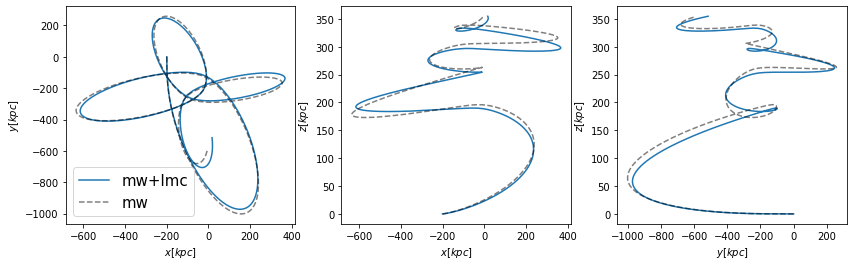

In [156]:
fig, ax = plt.subplots(1, 3, figsize=(14, 4))
ax[0].plot(orbit.x, orbit.y, label='mw+lmc')
ax[0].plot(orbit_mw.x, orbit_mw.y, ls='--', c='k', alpha=0.5, label='mw')

ax[1].plot(orbit.x, orbit.z)
ax[1].plot(orbit_mw.x, orbit_mw.z, ls='--', c='k', alpha=0.5)


ax[2].plot(orbit.y, orbit.z)
ax[2].plot(orbit_mw.y, orbit_mw.z, ls='--', c='k', alpha=0.5)

ax[0].set_xlabel(r'$x[kpc]$')
ax[0].set_ylabel(r'$y[kpc]$')

ax[1].set_xlabel(r'$x[kpc]$')
ax[1].set_ylabel(r'$z[kpc]$')

ax[2].set_xlabel(r'$y[kpc]$')
ax[2].set_ylabel(r'$z[kpc]$')

ax[0].legend(fontsize=15)

#savefig('gala_mwlmc_orbits.png', bbox_inches='tight')